In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256)


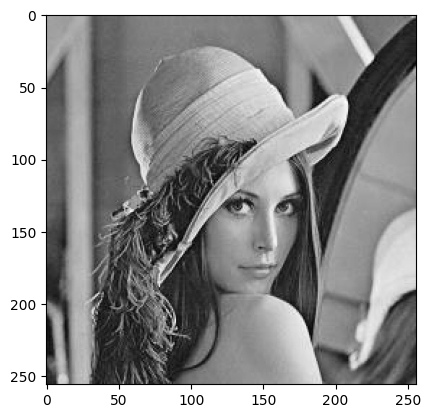

In [14]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#cv2_imshow(gimg1)
plt.imshow(gimg1, cmap='gray')

In [15]:
gOutimg = np.zeros((gimg1.shape[0], gimg1.shape[1]))

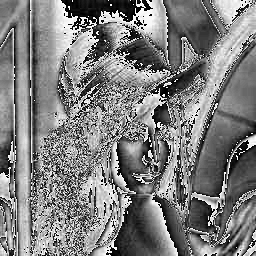

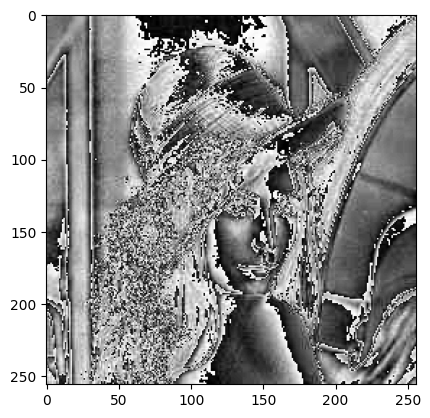

In [16]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]): # 2차원 배열이므로 중첩 for 루프 2개
    gOutimg[h, w] = gimg1[h, w]
    val = gimg1[h,w] % 64   # gimg의 모듈레이션 값을 64로 한다    Min : 0 Max : 63
    val = val * 4   # 이 값을 주석 처리 했다가 안했다가 사진을 비교해본다. 인간의 눈으로는 264 언저리의 값을 구별하지 못하므로 263정도 나와도 똑같은 이미지로 갈음
    gOutimg[h, w] = val

plt.imshow(gOutimg, cmap='gray')   # plt는 이미지를 아래와 같이 자동으로 보정한다(왜곡한다)
cv2_imshow(gOutimg)

In [17]:
equalVal = 128
width = 5

min = equalVal - width
max = equalVal + width


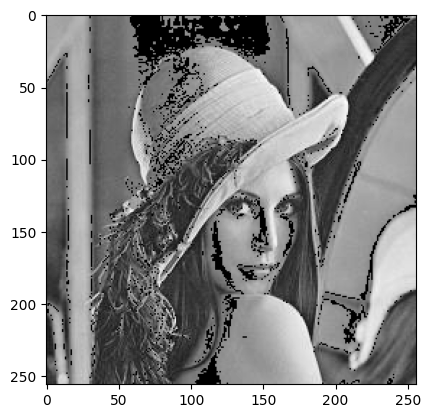

In [18]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    if(gimg1[h, w] > min and gimg1[h, w] < max):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = gimg1[h, w]

plt.imshow(gOutimg, cmap='gray')

In [ ]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = 255*(gimg1[h,w]/128 -1)*(gimg1[h,w]/128 -1)
    gOutimg[h,w] = val

  cv2_imshow(gOutimg)

In [46]:
planeNumber = 8 # 번째 비트플레인
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2


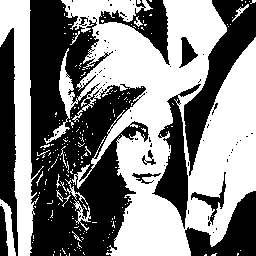

In [47]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = (int)(gimg1[h, w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255
cv2_imshow(gOutimg) # 최상위 비트플레인 보는법

(286, 322)


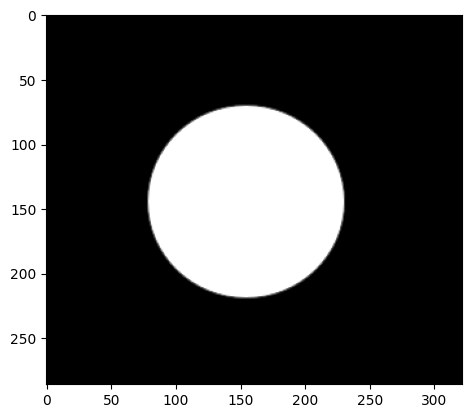

In [48]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
#cv2_imshow(gimg1)
plt.imshow(gimg2, cmap='gray')   ## 레나256 이미지에 circle.bmp의 워터마크 삽입하기

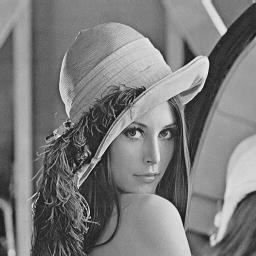

In [64]:
gWaterMarker = gimg1.copy()

for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = gimg2[h,w]
    if(imVal > 128):
      if(gimg1[h,w] % 2 == 0):  # 최하위 비트가 0인경우를 조건화 ?? 0이면 짝수고 1이면 홀수 이므로
        gWaterMarker[h,w] += 1 # 0을 1로 바꿔주는 연산
    else:
      if(gimg1[h,w] % 2 == 1):   # 최하위 비트가 1인 경우를 조건화
        gWaterMarker[h,w] -= 1 # 1을 0으로 바꿔주는 연산

cv2_imshow(gWaterMarker)

In [65]:
planeNumber = 1 # 번째 비트플레인
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2


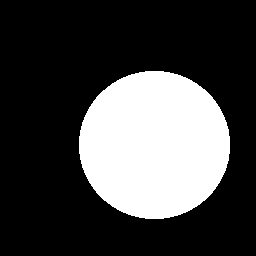

In [66]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = (int)(gWaterMarker[h, w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255
cv2_imshow(gOutimg)  # 최하위 비트에 있는 워터마크 출력됨